Task 1

Price        0
Area         0
Bedrooms     0
Bathrooms    0
dtype: int64


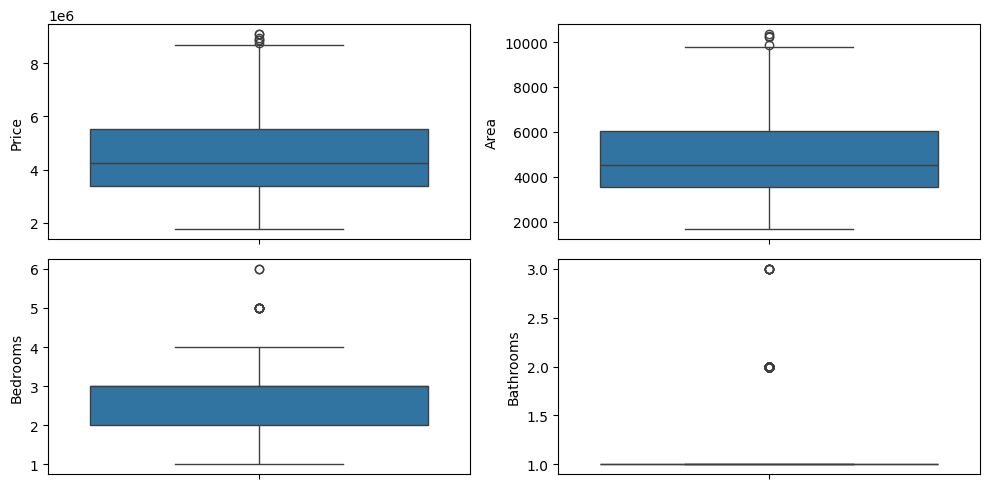

Intercept: 324957.43278984446
Coefficients: [3.95345618e+02 3.61296285e+05 9.90670457e+05]


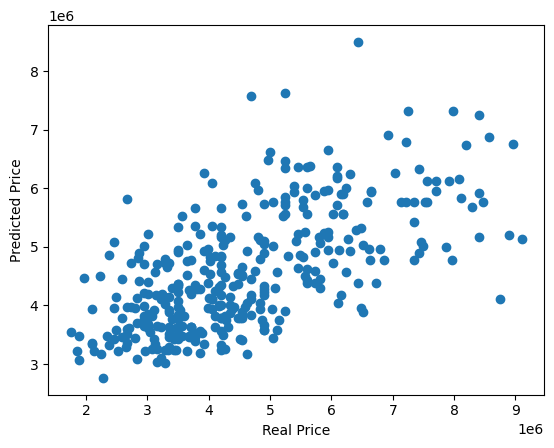

R2 Score: 0.4137179283145853


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
housing = pd.read_csv('train.csv')

# Select relevant columns
house = housing[['price', 'area', 'bedrooms', 'bathrooms']].rename(columns={
    'price': 'Price',
    'area': 'Area',
    'bedrooms': 'Bedrooms',
    'bathrooms': 'Bathrooms'
})

# Check for null values
print(house.isnull().sum())

# Outlier treatment
for column in ['Price', 'Area']:
    Q1 = house[column].quantile(0.25)
    Q3 = house[column].quantile(0.75)
    IQR = Q3 - Q1
    house = house[(house[column] >= Q1 - 1.5 * IQR) & (house[column] <= Q3 + 1.5 * IQR)]

# Outlier Analysis Visualization
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
for i, column in enumerate(['Price', 'Area', 'Bedrooms', 'Bathrooms']):
    sns.boxplot(house[column], ax=axs[i//2, i%2])
plt.tight_layout()
plt.show()

# Split the data
x = house.drop(columns='Price')
y = house['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Machine Learning Model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Model parameters
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# Predicting and visualization
y_pred_train = lr.predict(x_train)
plt.scatter(y_train, y_pred_train)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.show()

# R2 Score
print("R2 Score:", r2_score(y_train, y_pred_train))
